# Week 5, Data science in Neuroscience


## Plan for this week

1. Introduction to pytorch
2. Tensors
3. Train a linear model with pytorch
4. Train a simple neural network with pytorch
5. A convolutional network to process images (second session)

***
## pytorch installation

You will need to install the pytorch library to run the content of this notebook. There are instructions for installing pytorch on Windows computers [here](https://github.com/kevin-allen/dataScienceNeuro/blob/main/installation.md)

Alternatively, you could use Google Colab to run the notebook. You will need to follow the instructions [here](https://github.com/kevin-allen/dataScienceNeuro/blob/main/colab.md) to load data files from Google Colab.  

*** 
## Deep neural networks

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>




***
## Artificial neuron

A **neuron** is the building block of the neural network.


They do 3 things: 
* A linear transofrmation of the inputs
* Adding a constant 
* Applying a fixed nonlinear function (activation fucntion)
    
The input can be a single value or a vector. The output can be a single value or a vector.
***
### Linear model 

<img src="../images/neuron_linear.png" width="500" align="center">

***

### Artificial neuron



<img src="../images/artificial_neuron.png" width="500" align="center">

***
<div>
<img src="../images/pytorch.png" width="400"/>
</div>

Pytorch is a Python library that facilitates building deep learning projects

* Store data into Tensors (multidimensional arrays that are similar to NumPy arrays)
* Allows fast calculations on dedicated hardware (GPUs)
* Ability of tensors to keep track of the operations performed on them and to analytically compute derivatives
* Classes to deal with datasets
* Classes to simplify building deep neural networks

# Tensors

pytorch tensors are very similar to NumPy arrays. They have 2 main advantages

* Calculations can take place on accelerated hardware (e.g., GPU)
* Can keep track of the graph of computations that created them (used to calculate derivatives) 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating tensors

In [2]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [3]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
a = torch.tensor([[1.0,2],[3,4]])
a

tensor([[1., 2.],
        [3., 4.]])

You can interrogate a tensor just like a NumPy array.

In [5]:
print("shape:", a.shape)
print("ndim:", a.ndim)
print("dtype:", a.dtype)

shape: torch.Size([2, 2])
ndim: 2
dtype: torch.float32


You can generate random numbers with `torch.rand()`. You can change the shape of an array with `.reshape()`. Many of the mathematical functions of NumPy have a torch equivalent.

In [6]:
b = torch.rand(24).reshape(4,6)
b

tensor([[0.4540, 0.4680, 0.2029, 0.3522, 0.0155, 0.3365],
        [0.9257, 0.3383, 0.0771, 0.9630, 0.9393, 0.1701],
        [0.4678, 0.3956, 0.8151, 0.5089, 0.4192, 0.0938],
        [0.8366, 0.1114, 0.8026, 0.4169, 0.0702, 0.4735]])

In [7]:
b.shape

torch.Size([4, 6])

In [8]:
b.mean()

tensor(0.4439)

In [9]:
b.mean(axis=0)

tensor([0.6711, 0.3283, 0.4744, 0.5603, 0.3611, 0.2685])

We can add an extra dimension with a size of 1 using `.unsqueeze()`.

In [10]:
b.shape

torch.Size([4, 6])

In [11]:
b.unsqueeze(0).shape

torch.Size([1, 4, 6])

We can do broadcasting, just like with NumPy arrays.

```
When operating on two arrays, pytorch compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
​
* they are equal, or
* one of them is 1
```


In [12]:
b.shape

torch.Size([4, 6])

In [13]:
a = torch.ones(4)
a.shape

torch.Size([4])

In [16]:
#b+a

We can add a dimension of size 1 with `.unsqeeze()`

In [17]:
A = a.unsqueeze(1)
A.shape

torch.Size([4, 1])

In [18]:
b+A

tensor([[1.4540, 1.4680, 1.2029, 1.3522, 1.0155, 1.3365],
        [1.9257, 1.3383, 1.0771, 1.9630, 1.9393, 1.1701],
        [1.4678, 1.3956, 1.8151, 1.5089, 1.4192, 1.0938],
        [1.8366, 1.1114, 1.8026, 1.4169, 1.0702, 1.4735]])

We can get rid of a dimension of size 1 with `.squeeze()`

In [19]:
A.shape, A.squeeze().shape

(torch.Size([4, 1]), torch.Size([4]))

We can change the order of the dimensions in a tensor with `.permute()`

In [20]:
b.shape

torch.Size([4, 6])

In [21]:
b = torch.rand(3*24).reshape(3,4,6)
b

tensor([[[0.0398, 0.8026, 0.0490, 0.4709, 0.5066, 0.1132],
         [0.2051, 0.9254, 0.8075, 0.1708, 0.7945, 0.7001],
         [0.3830, 0.4093, 0.5636, 0.8324, 0.9923, 0.6923],
         [0.9821, 0.2175, 0.0445, 0.1468, 0.1133, 0.4550]],

        [[0.6234, 0.4812, 0.1165, 0.5431, 0.7714, 0.1794],
         [0.0701, 0.1981, 0.5205, 0.8489, 0.1271, 0.7646],
         [0.3355, 0.5834, 0.0661, 0.6697, 0.5160, 0.7305],
         [0.3428, 0.6008, 0.5480, 0.8154, 0.4873, 0.7741]],

        [[0.7403, 0.0119, 0.9382, 0.0508, 0.4834, 0.1797],
         [0.3602, 0.5741, 0.7889, 0.7383, 0.3270, 0.4125],
         [0.5560, 0.8382, 0.2958, 0.0285, 0.2492, 0.9904],
         [0.2336, 0.7518, 0.0771, 0.0444, 0.8523, 0.7658]]])

In [22]:
b.shape

torch.Size([3, 4, 6])

In [23]:
b = b.permute(1,2,0)
b.shape

torch.Size([4, 6, 3])

### Moving tensors to the GPU

Once you moved your tensors to the GPU, calculations on these tensors will be performed on the GPU. 

In [24]:
b = torch.rand(10)
b

tensor([0.8919, 0.7896, 0.1187, 0.0227, 0.2931, 0.4844, 0.9927, 0.7265, 0.5092,
        0.3388])

In [25]:
torch.cuda.is_available()

False

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cpu



In [27]:
b

tensor([0.8919, 0.7896, 0.1187, 0.0227, 0.2931, 0.4844, 0.9927, 0.7265, 0.5092,
        0.3388])

In [28]:
b = b.to(device)

In [29]:
b

tensor([0.8919, 0.7896, 0.1187, 0.0227, 0.2931, 0.4844, 0.9927, 0.7265, 0.5092,
        0.3388])

In [30]:
b = b.to("cpu")
b

tensor([0.8919, 0.7896, 0.1187, 0.0227, 0.2931, 0.4844, 0.9927, 0.7265, 0.5092,
        0.3388])

In [31]:
#b = b.to("cuda")
#b

## From pytorch tensors to NumPy arrays and back

You can go between tensors and NumPy arrays using `torch.from_numpy()` and `myTensor.numpy()`

In [32]:
points_pt = torch.tensor([2,3,4])
print(type(points_pt))
points_np = points_pt.numpy()
print(type(points_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [33]:
a = np.array([1,2,3,4])
torch.from_numpy(a)

tensor([1, 2, 3, 4])

***
# Training a linear model using pytorch

We will recreate our machine learning example of week 2 using pytorch.

We want to predict the firing rate of a neuron from the running speed of the animal.


In [34]:
fn = "../data/animal_speed.npy"

In [35]:
speed = np.load(fn)
speed = speed[0:100]

In [36]:
w = 1.25 # weight (slope)
b = 10 # bias (intercept)
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed* w + b + e # simulate the firing rate
rate = np.maximum(0, rate) # eliminate the negative firing rates

Text(0, 0.5, 'Firing rate (Hz)')

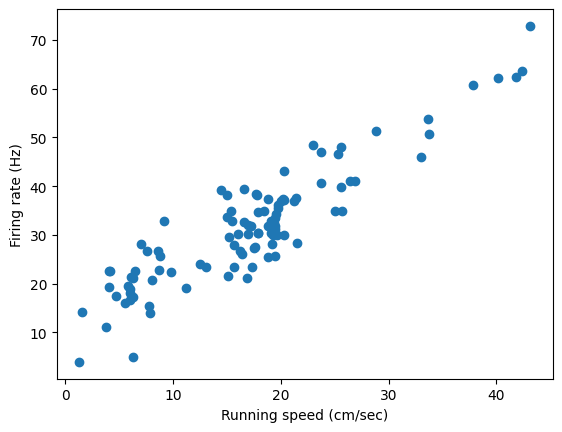

In [37]:
plt.scatter(speed,rate)
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")

### Create a model with pytorch

We will recreate our **linear regression model** using pytorch. 


$yhat = b+ w*X$


<img src="../images/neuron_linear.png" width="500" align="center">

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

This is **not a neural network**, but a linear model.

In [39]:
import torch.nn as nn

class Lin_model(nn.Module):
    """
    Class to create pytorch model.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.linLayer = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.linLayer(x)
        return out

We define our model using a class that inherits from `nn.Module`.

We will use a similar class definition for more complex models.

In [40]:
lin_model = Lin_model() # create model from our class definition

The parameters of the models are created automatically when creating the model.

We can use this for loop to print the parameters.

In [41]:
for name,p in lin_model.named_parameters():
    print(name, p)

linLayer.weight Parameter containing:
tensor([[0.2412]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.5827], requires_grad=True)


In [42]:
print("Number of parameters:", sum(p.numel() for p in lin_model.parameters()))

Number of parameters: 2


### Loss function

pytorch has built-in loss functions that we can use in our training loop. We will use the mean squared error (MSE).

In [43]:
# loss function returning MSE
loss_fn = torch.nn.MSELoss()

### pytorch optimizers

Optimizers are used to change our model parameters during learning.

There are several optimization strategies and tricks that can improve learning. 

There are more important when building deep neural networks than for linear regression models.

Let's see how to use the SGD optimizer.

In [44]:
import torch.optim as optim

In [45]:
learning_rate = 0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)

## Data format for our model

* X: input data
* y: labels or values that we want to predict


We need to store them in `tensors`.

X: Input data, the first dimension (rows) is for the observations. The second dimension is for features. We only have 1 input feature (speed), so the second dimension will have a size of 1.

y: The first dimension (rows) is for the observations. The second is for the output features. In this case, we have one output feature (firing rate)

In [46]:
X = torch.from_numpy(speed).unsqueeze(1).float()

In [47]:
X.shape

torch.Size([100, 1])

In [48]:
y = torch.from_numpy(rate).unsqueeze(1).float()
y.shape

torch.Size([100, 1])

### One forward pass 

We now all our needed element to train our model.

Before using our training loop, it is a good idea to run one forward pass outside of the for loop to identify potential problems.

We run all the steps that will be in our training loop.

In [49]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[0.2412]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.5827], requires_grad=True)


In [50]:
yhat = lin_model(X)

In [51]:
loss =  loss_fn(yhat,y)

In [52]:
optimizer.zero_grad() # zero the gradients

In [53]:
loss.backward() # calculate gradients

In [54]:
optimizer.step() # will change the model parameters to reduce the loss        

In [55]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[1.3245]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.6366], requires_grad=True)


### Training loop

We want a generic training loop that will work in most situations.

In [56]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, loss_fn, model, X,y):
    for epoch in range (n_epochs):
        
        yhat = model(X) # make predictions
        loss = loss_fn(yhat,y) # calculate the loss
        optimizer.zero_grad() # zero the gradients of our model's parameters
        loss.backward() # calculate gradients of the model's parameters
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return

In [57]:
training_loop(n_epochs = 20000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 96.40115356445312
Epoch: 1, Loss: 49.841209411621094
Epoch: 2, Loss: 46.880226135253906
Epoch: 3, Loss: 46.67573547363281
Epoch: 4, Loss: 46.645530700683594
Epoch: 5, Loss: 46.62636184692383
Epoch: 6, Loss: 46.607913970947266
Epoch: 7, Loss: 46.589515686035156
Epoch: 8, Loss: 46.571144104003906
Epoch: 9, Loss: 46.55278396606445
Epoch: 1000, Loss: 34.34800720214844
Epoch: 2000, Loss: 29.147443771362305
Epoch: 3000, Loss: 26.961135864257812
Epoch: 4000, Loss: 26.042009353637695
Epoch: 5000, Loss: 25.655620574951172
Epoch: 6000, Loss: 25.493183135986328
Epoch: 7000, Loss: 25.42489242553711
Epoch: 8000, Loss: 25.39618492126465
Epoch: 9000, Loss: 25.384117126464844
Epoch: 10000, Loss: 25.379037857055664
Epoch: 11000, Loss: 25.376907348632812
Epoch: 12000, Loss: 25.37601089477539
Epoch: 13000, Loss: 25.375633239746094
Epoch: 14000, Loss: 25.375473022460938
Epoch: 15000, Loss: 25.375410079956055
Epoch: 16000, Loss: 25.375381469726562
Epoch: 17000, Loss: 25.375368118286133
Epoc

In [58]:
for p in lin_model.parameters():
    print(p)

Parameter containing:
tensor([[1.2343]], requires_grad=True)
Parameter containing:
tensor([10.5679], requires_grad=True)


In [59]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [62]:
t_range

tensor([[ 0.0000],
        [ 0.5000],
        [ 1.0000],
        [ 1.5000],
        [ 2.0000],
        [ 2.5000],
        [ 3.0000],
        [ 3.5000],
        [ 4.0000],
        [ 4.5000],
        [ 5.0000],
        [ 5.5000],
        [ 6.0000],
        [ 6.5000],
        [ 7.0000],
        [ 7.5000],
        [ 8.0000],
        [ 8.5000],
        [ 9.0000],
        [ 9.5000],
        [10.0000],
        [10.5000],
        [11.0000],
        [11.5000],
        [12.0000],
        [12.5000],
        [13.0000],
        [13.5000],
        [14.0000],
        [14.5000],
        [15.0000],
        [15.5000],
        [16.0000],
        [16.5000],
        [17.0000],
        [17.5000],
        [18.0000],
        [18.5000],
        [19.0000],
        [19.5000],
        [20.0000],
        [20.5000],
        [21.0000],
        [21.5000],
        [22.0000],
        [22.5000],
        [23.0000],
        [23.5000],
        [24.0000],
        [24.5000],
        [25.0000],
        [25.5000],
        [26.

In [60]:
lin_yhat = lin_model(t_range)

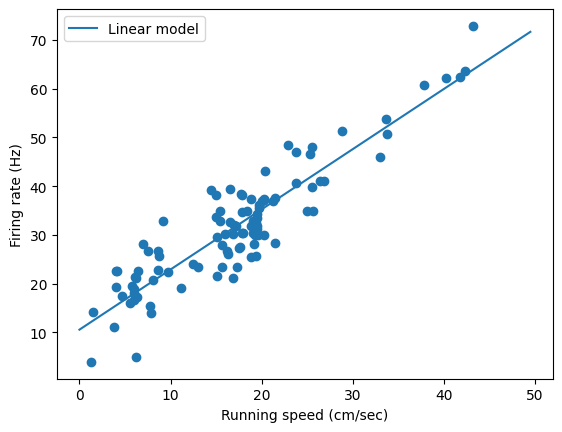

In [61]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

We found the parameters that were used to simulate the data.

# A first neural network

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.



***

* A neuron in a neural network has one more non-linear function. 

<img src="../images/artificial_neuron.png" width="500" align="center">

The non-linear function allows the model to have different slope at different values.

The non-linear function of the neuron is called the **activation function**.

Text(0.5, 1.0, 'Non-linear model: tanh(w*x+b)')

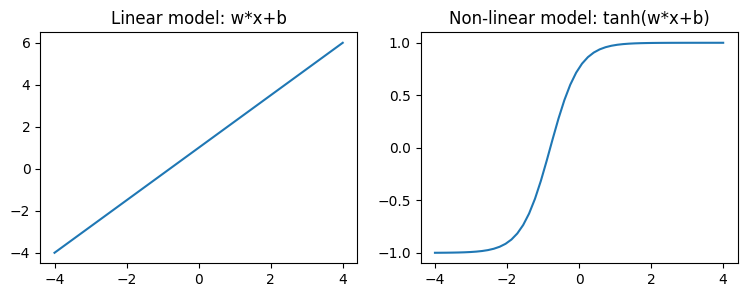

In [66]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3))

XX = np.linspace(-4,4) # input
          
w=1.25
b=1.0
                
ax[0].plot(XX,w*XX+b)
ax[0].set_title("Linear model: w*x+b")

ax[1].plot(XX,np.tanh(w*XX+b))
ax[1].set_title("Non-linear model: tanh(w*x+b)")

In neural network, we have **several artificial neurons**. 

The output of several neurons is summed to get the output.

Let's build a neural network to predict the firing rate from the speed of the animal.

In [63]:
class NN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=5, bias=True)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=5, out_features=1, bias=True)
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.layer1(x)
        out = self.tanh(out)
        out = self.layer2(out)
        return out

In [64]:
nn_model = NN_model()

In [65]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[-0.2784],
        [-0.3019],
        [ 0.9840],
        [-0.7561],
        [ 0.8659]], requires_grad=True)
layer1.bias Parameter containing:
tensor([0.7483, 0.9529, 0.6841, 0.2817, 0.5710], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 0.2645,  0.3482, -0.1141, -0.0425,  0.1126]], requires_grad=True)
layer2.bias Parameter containing:
tensor([-0.1410], requires_grad=True)


In [66]:
print("Number of parameters:", sum(p.numel() for p in nn_model.parameters()))

Number of parameters: 16


In [67]:
learning_rate=0.0001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)

In [68]:
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 1195.7772216796875
Epoch: 1, Loss: 1193.3419189453125
Epoch: 2, Loss: 1190.91259765625
Epoch: 3, Loss: 1188.4898681640625
Epoch: 4, Loss: 1186.073486328125
Epoch: 5, Loss: 1183.6632080078125
Epoch: 6, Loss: 1181.2593994140625
Epoch: 7, Loss: 1178.86181640625
Epoch: 8, Loss: 1176.470458984375
Epoch: 9, Loss: 1174.08544921875
Epoch: 1000, Loss: 238.5777130126953
Epoch: 2000, Loss: 116.03845977783203
Epoch: 3000, Loss: 85.41264343261719
Epoch: 4000, Loss: 71.06676483154297
Epoch: 5000, Loss: 61.80583190917969
Epoch: 6000, Loss: 59.15570831298828
Epoch: 7000, Loss: 74.31402587890625
Epoch: 8000, Loss: 55.6102409362793
Epoch: 9000, Loss: 76.542236328125
Epoch: 10000, Loss: 55.81684875488281
Epoch: 11000, Loss: 45.75727462768555
Epoch: 12000, Loss: 42.23051452636719
Epoch: 13000, Loss: 39.924354553222656
Epoch: 14000, Loss: 38.17066955566406
Epoch: 15000, Loss: 36.77769088745117
Epoch: 16000, Loss: 35.64738845825195
Epoch: 17000, Loss: 34.718605041503906
Epoch: 18000, Loss: 3

In [69]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[-0.1428],
        [-0.1734],
        [ 0.9118],
        [-0.2958],
        [ 0.7707]], requires_grad=True)
layer1.bias Parameter containing:
tensor([1.8845, 4.8020, 0.6041, 0.3720, 0.4421], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-9.2148, -9.7576,  9.3707, -9.5525,  9.6010]], requires_grad=True)
layer2.bias Parameter containing:
tensor([9.3382], requires_grad=True)


### Let's compare our linear model with our small neural network

In [70]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [71]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

To plot the `yhat` tensors, we need to call `.detach()` because the tensor have associated gradients.

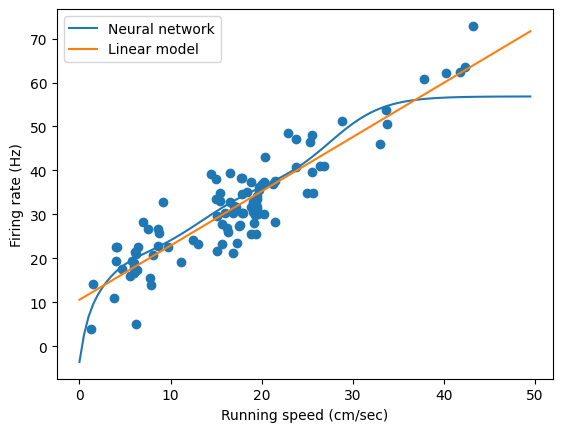

In [72]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

### Neural networks can model all sorts of functions

Let's try our two models on some non-linear problems

In [73]:
X = torch.arange(0,10,0.1).unsqueeze(1)
print(X.shape)
y = torch.sin(X)*4 + torch.randn(100, 1)

torch.Size([100, 1])


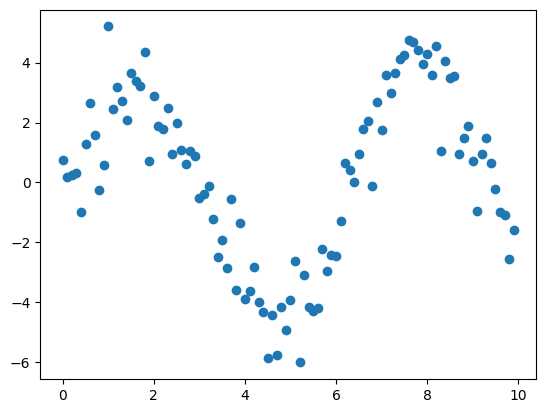

In [74]:
plt.scatter(X.numpy(),y.numpy())

In [75]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 316.4942932128906
Epoch: 1, Loss: 12.620428085327148
Epoch: 2, Loss: 10.208174705505371
Epoch: 3, Loss: 9.717536926269531
Epoch: 4, Loss: 9.448182106018066
Epoch: 5, Loss: 9.269460678100586
Epoch: 6, Loss: 9.137953758239746
Epoch: 7, Loss: 9.03442096710205
Epoch: 8, Loss: 8.948931694030762
Epoch: 9, Loss: 8.875823020935059
Epoch: 1000, Loss: 6.894703388214111
Epoch: 2000, Loss: 6.7313923835754395
Epoch: 3000, Loss: 6.552404880523682
Epoch: 4000, Loss: 6.3360981941223145
Epoch: 5000, Loss: 6.073976993560791
Epoch: 6000, Loss: 5.771004676818848
Epoch: 7000, Loss: 5.320565700531006
Epoch: 8000, Loss: 4.7709760665893555
Epoch: 9000, Loss: 4.082614898681641
Epoch: 10000, Loss: 3.944636344909668
Epoch: 11000, Loss: 3.870422601699829
Epoch: 12000, Loss: 3.74741268157959
Epoch: 13000, Loss: 3.4939355850219727
Epoch: 14000, Loss: 3.1382622718811035
Epoch: 15000, Loss: 2.798976421356201
Epoch: 16000, Loss: 2.624166250228882
Epoch: 17000, Loss: 2.492680072784424
Epoch: 18000, Loss

In [76]:
learning_rate=0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 289.345947265625
Epoch: 1, Loss: 256.1586608886719
Epoch: 2, Loss: 227.27691650390625
Epoch: 3, Loss: 202.14175415039062
Epoch: 4, Loss: 180.2667236328125
Epoch: 5, Loss: 161.2285614013672
Epoch: 6, Loss: 144.65895080566406
Epoch: 7, Loss: 130.2373504638672
Epoch: 8, Loss: 117.6849136352539
Epoch: 9, Loss: 106.75894165039062
Epoch: 1000, Loss: 17.6830997467041
Epoch: 2000, Loss: 11.660880088806152
Epoch: 3000, Loss: 9.428973197937012
Epoch: 4000, Loss: 8.601799964904785
Epoch: 5000, Loss: 8.295239448547363
Epoch: 6000, Loss: 8.181623458862305
Epoch: 7000, Loss: 8.139516830444336
Epoch: 8000, Loss: 8.123910903930664
Epoch: 9000, Loss: 8.118127822875977
Epoch: 10000, Loss: 8.115983009338379
Epoch: 11000, Loss: 8.115187644958496
Epoch: 12000, Loss: 8.11489486694336
Epoch: 13000, Loss: 8.114785194396973
Epoch: 14000, Loss: 8.114745140075684
Epoch: 15000, Loss: 8.114728927612305
Epoch: 16000, Loss: 8.114725112915039
Epoch: 17000, Loss: 8.11472225189209
Epoch: 18000, Loss: 8.

In [77]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [78]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

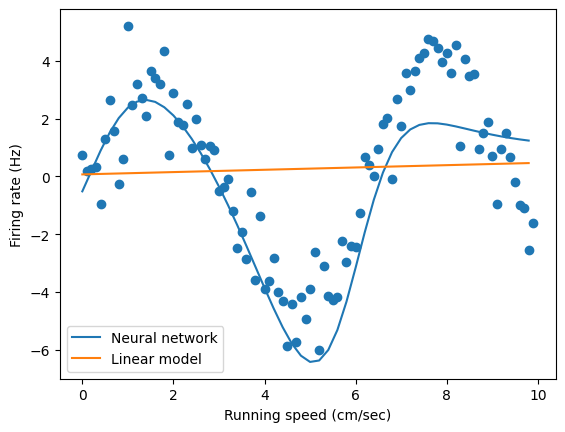

In [79]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

The non-linearity in the artifical neurons makes it possible to fit all sorts of function.

Here, the neural network is a better approximation of the underlying data. 

## Exercise

### Improve our neural network model

Our neural network is good but it is not perfect. 

How could you modify this model to make it fit the data more closely?

Have a go at trying to improve its predictions.

In [114]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 60000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 10.915761947631836
Epoch: 1, Loss: 10.829551696777344
Epoch: 2, Loss: 10.747553825378418
Epoch: 3, Loss: 10.669563293457031
Epoch: 4, Loss: 10.595392227172852
Epoch: 5, Loss: 10.524857521057129
Epoch: 6, Loss: 10.457784652709961
Epoch: 7, Loss: 10.394011497497559
Epoch: 8, Loss: 10.333378791809082
Epoch: 9, Loss: 10.275739669799805
Epoch: 1000, Loss: 8.444541931152344
Epoch: 2000, Loss: 7.876040458679199
Epoch: 3000, Loss: 7.479679107666016
Epoch: 4000, Loss: 7.034619331359863
Epoch: 5000, Loss: 6.427706241607666
Epoch: 6000, Loss: 5.7121782302856445
Epoch: 7000, Loss: 5.01662540435791
Epoch: 8000, Loss: 4.434089183807373
Epoch: 9000, Loss: 3.987821340560913
Epoch: 10000, Loss: 3.6579394340515137
Epoch: 11000, Loss: 3.4145443439483643
Epoch: 12000, Loss: 3.2333130836486816
Epoch: 13000, Loss: 3.0978784561157227
Epoch: 14000, Loss: 2.9962143898010254
Epoch: 15000, Loss: 2.918872117996216
Epoch: 16000, Loss: 2.8578152656555176
Epoch: 17000, Loss: 2.8041436672210693
Epoch:

In [115]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [107]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

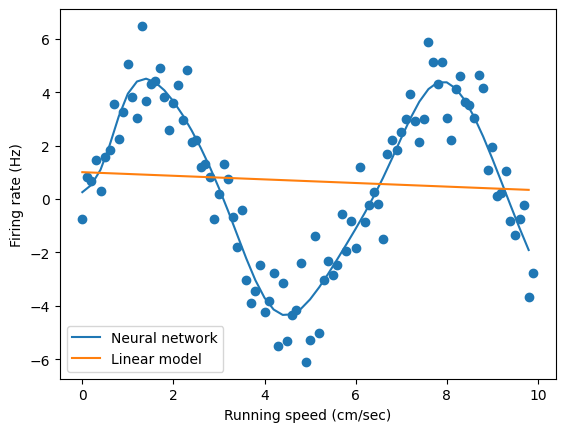

In [108]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

## Adding more hidden layers to create a deep neural network

**Deep neural networks** have several hidden layers.

* The output of the first layer have a shape similar to the activiation function.
* The next level can combine the inputs of the first layers to create more complex functions.


Text(0, 0.5, 'output')

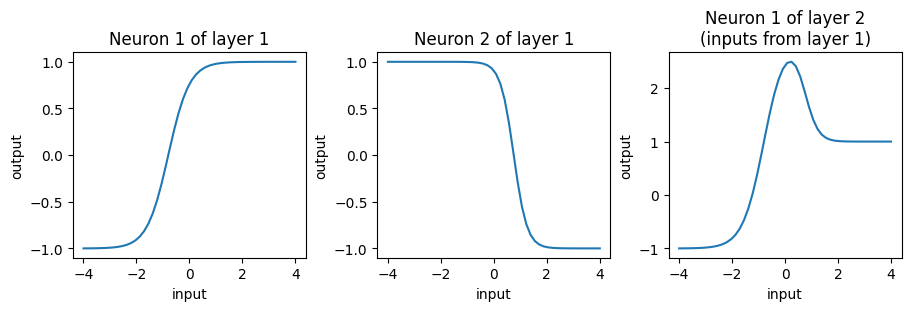

In [118]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

XX = np.linspace(-4,4) # input
      
# 
w1=1.25
b1=1.0                
ax[0].plot(XX,np.tanh(w1*XX+b1))
ax[0].set_title("Neuron 1 of layer 1")
ax[0].set_xlabel("input")
ax[0].set_ylabel("output")

w2=-2
b2=1.5
ax[1].plot(XX,np.tanh(w2*XX+b2))
ax[1].set_title("Neuron 2 of layer 1")
ax[1].set_xlabel("input")
ax[1].set_ylabel("output")

w3=[2,1]
b3=2
ax[2].plot(XX,w3[0]*np.tanh(w1*XX+b1)+ w3[1]*np.tanh(w2*XX+b2))
ax[2].set_title("Neuron 1 of layer 2\n(inputs from layer 1)")
ax[2].set_xlabel("input")
ax[2].set_ylabel("output")

In [119]:
class DNN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=10, bias=True)
        self.layer2 = nn.Linear(in_features=10, out_features=10, bias=True)
        self.layer3 = nn.Linear(in_features=10, out_features=1, bias=True)
        self.tanh = nn.Tanh()
        
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.tanh(self.layer1(x))
        out = self.tanh(self.layer2(out))
        out = self.layer3(out)
        
        return out

In [120]:
dnn_model = DNN_model()

In [121]:
for name, p in dnn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.5656],
        [ 0.9519],
        [-0.8644],
        [ 0.1782],
        [ 0.4497],
        [ 0.7277],
        [-0.2182],
        [-0.9980],
        [ 0.5420],
        [ 0.2739]], requires_grad=True)
layer1.bias Parameter containing:
tensor([ 0.0478, -0.1899, -0.4845, -0.8605, -0.4237,  0.5104,  0.3978, -0.4544,
        -0.3024,  0.7056], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 0.1810,  0.1051,  0.0573, -0.2002, -0.0720,  0.2860,  0.3039, -0.0098,
          0.1650, -0.2375],
        [-0.0810, -0.1745,  0.1505,  0.0813, -0.0558,  0.2319,  0.1996,  0.0827,
         -0.1305,  0.1591],
        [-0.0568, -0.2170, -0.2192,  0.1874,  0.2388,  0.0998, -0.2042, -0.0340,
         -0.2558, -0.1055],
        [ 0.1892, -0.1015,  0.0413,  0.1421, -0.2120, -0.1053, -0.1258, -0.0308,
         -0.0956, -0.0144],
        [ 0.2248,  0.0970, -0.0967,  0.0569,  0.0518, -0.2650,  0.2532,  0.1243,
          0.1118, -0.2755],
        [ 0

In [122]:
print("Number of parameters:", sum(p.numel() for p in dnn_model.parameters()))

Number of parameters: 141


In [123]:
learning_rate=0.001
optimizer = optim.SGD(dnn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=dnn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 9.624743461608887
Epoch: 1, Loss: 9.620094299316406
Epoch: 2, Loss: 9.615513801574707
Epoch: 3, Loss: 9.611000061035156
Epoch: 4, Loss: 9.606550216674805
Epoch: 5, Loss: 9.602164268493652
Epoch: 6, Loss: 9.597840309143066
Epoch: 7, Loss: 9.593579292297363
Epoch: 8, Loss: 9.589381217956543
Epoch: 9, Loss: 9.58523941040039
Epoch: 1000, Loss: 8.820018768310547
Epoch: 2000, Loss: 7.916651725769043
Epoch: 3000, Loss: 6.437360763549805
Epoch: 4000, Loss: 4.6005401611328125
Epoch: 5000, Loss: 3.5731770992279053
Epoch: 6000, Loss: 3.0418686866760254
Epoch: 7000, Loss: 2.7643942832946777
Epoch: 8000, Loss: 2.655991315841675
Epoch: 9000, Loss: 2.6036853790283203
Epoch: 10000, Loss: 2.570239543914795
Epoch: 11000, Loss: 2.545386552810669
Epoch: 12000, Loss: 2.5243728160858154
Epoch: 13000, Loss: 2.5036916732788086
Epoch: 14000, Loss: 2.478895664215088
Epoch: 15000, Loss: 2.442991018295288
Epoch: 16000, Loss: 2.388669729232788
Epoch: 17000, Loss: 2.3117966651916504
Epoch: 18000, Lo

In [124]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)
dnn_yhat = dnn_model(t_range)

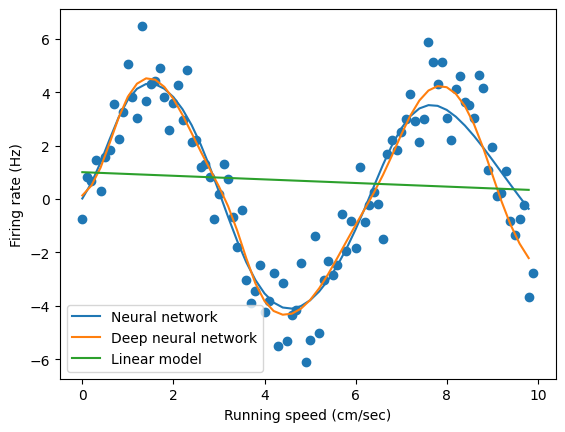

In [125]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),dnn_yhat.detach().numpy(),label="Deep neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

# Exercise (Homework)

Train a neural network that would predict the firing rate of a neuron based on speed and acceleration.

The X tensor will have to have a shape of (27304,2)


In [86]:
fn = "../data/animal_acceleration.npy"
acceleration = np.load(fn)

fn = "../data/animal_speed.npy"
speed = np.load(fn)

fn =  "../data/y_rate.npy"
rate = np.load(fn)

In [87]:
rate.shape

(27304,)

Text(0, 0.5, 'Firing rate (Hz)')

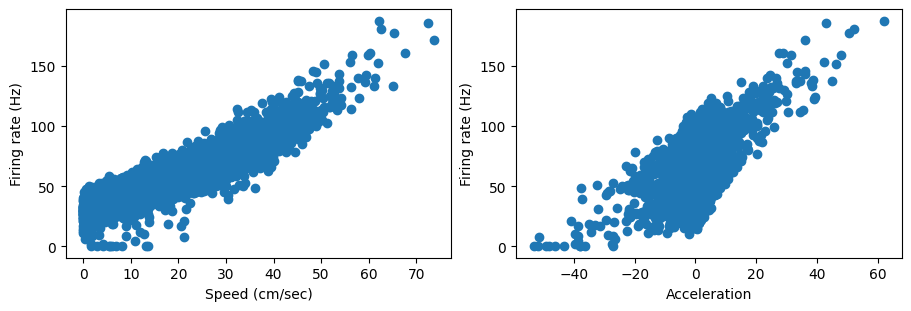

In [88]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

ax[0].scatter(speed,rate)
ax[0].set_xlabel("Speed (cm/sec)")
ax[0].set_ylabel("Firing rate (Hz)")
ax[1].scatter(acceleration,rate)
ax[1].set_xlabel("Acceleration")
ax[1].set_ylabel("Firing rate (Hz)")